# Introduction to Deep Learning in Python - Part 2

## Optimizing neural network with backward propagation

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Calculating model errors
For the exercises in this chapter, you'll continue working with the network to predict transactions for a bank.

What is the error (predicted - actual) for the following network using the ReLU activation function when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? It may be helpful to get out a pen and piece of paper to calculate these values.
![model error](imgs/ch2_ex2_3.png)

**Answer: 11**

### Understanding how weights change model accuracy
Imagine you have to make a prediction for a single data point. The actual value of the target is 7. The weight going from node_0 to the output is 2, as shown below. If you increased it slightly, changing it to 2.01, would the predictions become more accurate, less accurate, or stay the same?
![model error](imgs/ch2_ex2_3.png)

**Answer: Less accurate.**

### Coding how weight changes affect accuracy
Now you'll get to change weights in a real network and see how they affect model accuracy!

Have a look at the following neural network:
![](imgs/ch2ex4.png)

Its weights have been pre-loaded as weights_0. Your task in this exercise is to update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).

Use a pen and paper if necessary to experiment with different combinations. You'll use the predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

In [3]:
def relu(input):
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)

    # Return the value just calculated
    return(output)

def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])

    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)

    # Return model output
    return(model_output)

# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


### Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.

input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.

You'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

In [6]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {
    'node_0': np.array([2, 1]),
    'node_1': np.array([1. , 1.5]),
    'output': np.array([1. , 1.5])
}

# Create model_output_0
model_output_0 = []
# Create model_output_0
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))

    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


### Calculating slopes
You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is `2 * x * (xb-y)`, or `2 * input_data * error`. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called weights as well as data for a single point called input_data. The actual value of the target you want to predict is stored in target.

In [7]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds-target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


### Improving model weights
Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

The weights have been pre-loaded as weights, the actual value of the target as target, and the input data as input_data. The predictions from the initial weights are stored as preds.

In [9]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - slope * learning_rate

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


### Making multiple updates to weights
You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

We have also pre-loaded matplotlib.pyplot, and the error history will be plotted after you have done your gradient descent steps.

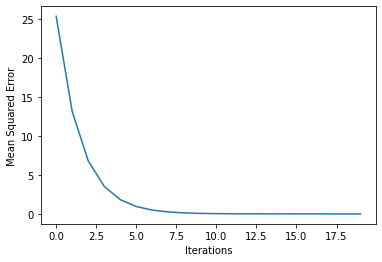

In [11]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

learning_rate = 0.01
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)

    # Update the weights: weights
    weights = weights - slope * learning_rate

    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)

    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

### The relationship between forward and backward propagation
If you have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must you have done forward propagation?

**Answer: 4**

### Thinking about backward propagation
If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, which of the following statements would be correct?

**Answer: The updates to all weights in the network would also be 0.**

### A round of backpropagation
In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black. Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple.

This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).
![](imgs/ch2ex14_1.png)
What is the slope needed to update the weight with the question mark?
![](imgs/ch2ex14_2.png)

**Answer: 6**